# Proyek Analisis Data: Bike Sharing
- **Nama:** Muhamad Teguh Galih Pamenang
- **Email:** galihwijanardi226@gmail.com
- **ID Dicoding:** galihw

## Menentukan Pertanyaan Bisnis

- Apakah terjadi kenaikan pengguna *bike sharing* berdasarkan tahun, musim, ataupun jam?
- Apakah terdapat korelasi antara nilai *temp*, *hum*, dan *windspeed* dengan banyaknya pengguna *bike sharing*?
- Bagaimana perbandingan total dan rata-rata banyaknya pengguna *bike sharing* pada *workingday*, *weekend*, dan *holiday* yang terjadi di *workingday*?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import io
import os
from google.colab import files

## Data Wrangling

### Gathering Data

Data diperoleh dari: https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset/data?select=hour.csv.

Proses import data dilakukan dengan mengunduh data set berformat **.csv** dari laman kaggle terlebih dahulu. Data set ini kemudian diupload ke google colab untuk selanjutnya disimpan ke dalam sebuah variabel menggunakan library pandas.

In [2]:
if os.path.exists('hour.csv'):
  os.remove('hour.csv')

Run this to reset uploaded file

**Importing hour.csv**

In [3]:
uploaded = files.upload()

hour_df = pd.read_csv(io.BytesIO(uploaded['hour.csv']))
hour_df.head()

Saving hour.csv to hour.csv


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Pada kasus ini, kita hanya perlu mengimpor data set **hour.csv** karena data set **hour.csv** merupakan data set **day.csv** yang lebih rinci.

**README:**

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered


### Assessing Data

Mengecek Keberadaan Missing Value

In [4]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight**:
1. Tidak terdapat missing value pada tabel "hour"
2. Kolom "dteday" seharusnya bertipe **datetime**.
3. Kolom "season", "yr", "mnth", "hr", "holiday", "weekday", "workingday", dan "workingsit" seharusnya tidak bertipe **int**.

**Deskrispsi Data**

In [5]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight**:
1. Banyaknya data pada tabel "hour" yaitu sebanyak 17379 data.
2. Dalam satu satuan jam, rata-rata banyaknya pengguna bike sharing adalah sebanyak 189.463088 = 189 orang.
3. Banyaknya pengguna bike sharing dalam satu satuan jam berkisar diantara 1 sampai 977 orang.
4. Dalam satu satuan jam, rata-rata banyaknya pengguna bike sharing yang berstatus casual adalah sebanyak 35.676218 = 35 orang.
5. Banyaknya pengguna bike sharing yang berstatus casual dalam satu satuan jam berkisar diantara 0 sampai 367 orang.
6. Dalam satu satuan jam, rata-rata banyaknya pengguna bike sharing yang berstatus registered adalah 153.786869 = 153 orang.
7. Banyaknya pengguna bike sharing yang berstatus registred dalam satu satuan jam berkisar diantara 0 sampai 886 orang.
8. Baik nilai maksimum maupun nilai minimum banyaknya pengguna bike sharing berstatus casual dan registered tidak terjadi pada jam yang sama.


**Mengecek Keberadaan Duplicate Data**

In [6]:
hour_df = hour_df.drop(columns = ['instant'])

Menghapus kolom 'instant' yang berfungsi sebagai index data untuk mengecek keberadaan duplicate data.

In [7]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**

Tidak terdapat data duplikat pada tabel "hour"

**Mengecek Keberadaan Outlier**

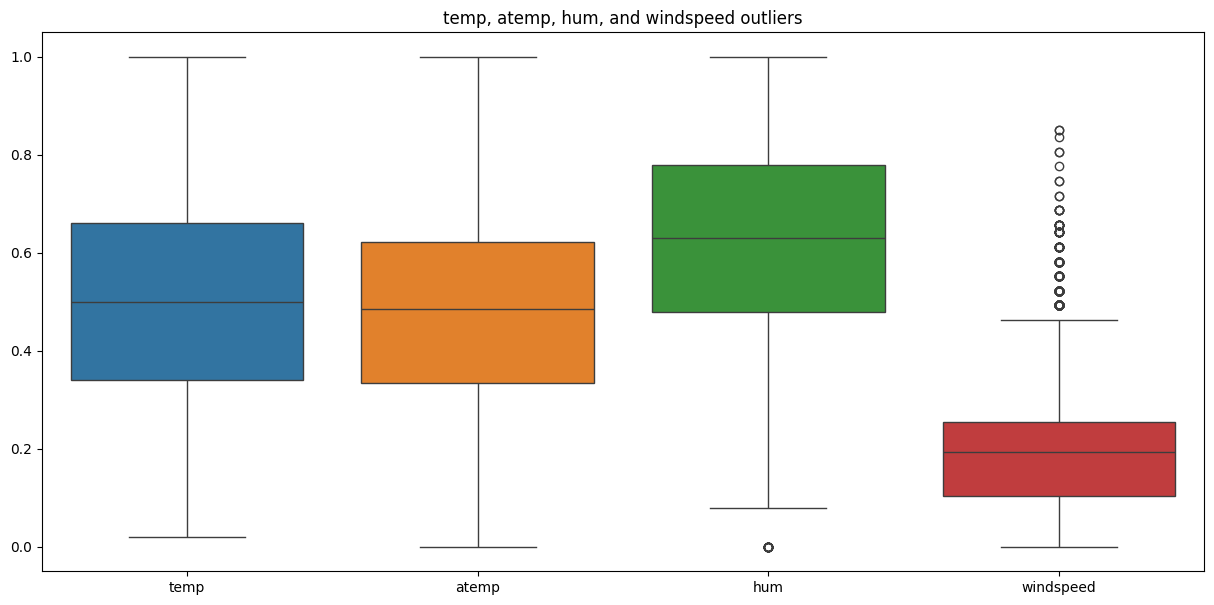

In [8]:
fig,ax=plt.subplots(figsize=(15,7))
sns.boxplot(data=hour_df[['temp','atemp','hum','windspeed']])
ax.set_title('temp, atemp, hum, and windspeed outliers')
plt.show()

**Insight**

1. Tidak terdapat data outlier pada kolom "temp" dan "atemp".
2. Terdapat data outlier pada kolom "hum" dan "windspeed" yang selanjutnya akan diproses pada langkah cleaning data.

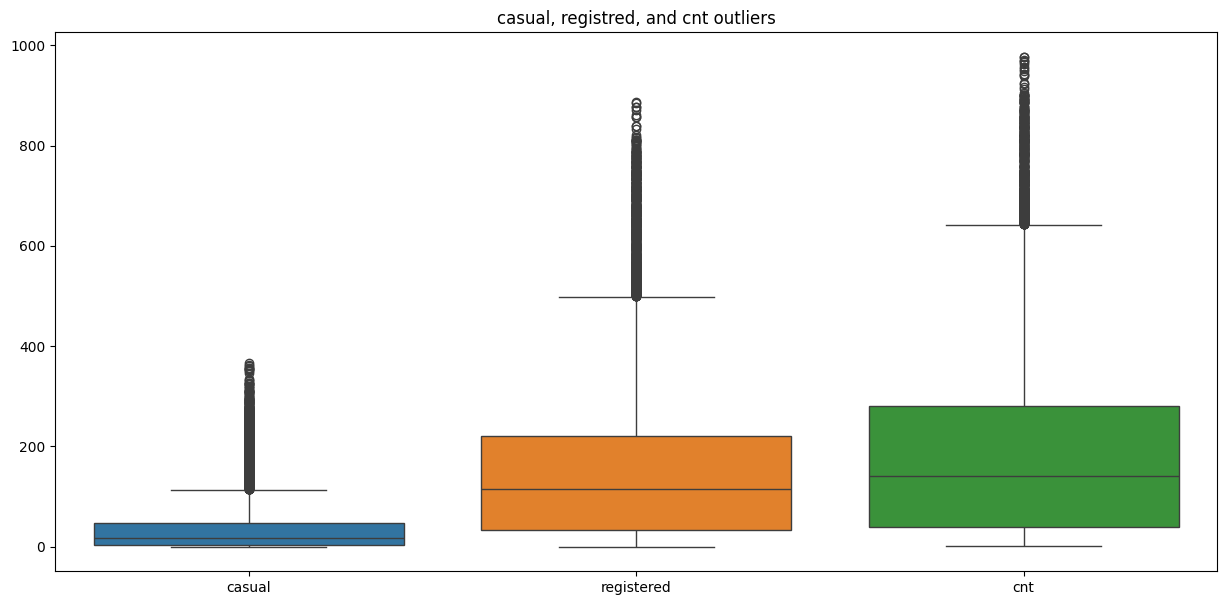

In [9]:
fig,ax=plt.subplots(figsize=(15,7))
sns.boxplot(data=hour_df[['casual','registered','cnt']])
ax.set_title('casual, registred, and cnt outliers')
plt.show()

**Insight**

Terdapat data outlier pada kolom "casual", "registred", dan "cnt". Namun data outlier ini diabaikan karena lonjakan pengguna *bike sharing* mungkin terjadi diakibatkan beberapa faktor seperti *holiday*, *weekend*, dan sebagainya.

### Cleaning Data

In [10]:
hour_df['season'] = hour_df['season'].astype(int)
hour_df['season'] = hour_df['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
season_order = ['Spring', 'Summer', 'Fall', 'Winter']
hour_df['season'] = pd.Categorical(hour_df['season'], categories=season_order, ordered=True)

hour_df['yr'] = hour_df['yr'].replace({0: 2011, 1: 2012})

hour_df['mnth'] = hour_df['mnth'].astype(int)
hour_df['mnth'] = hour_df['mnth'].replace({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
    })
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
hour_df['mnth'] = pd.Categorical(hour_df['mnth'], categories=month_order, ordered=True)

hour_df['holiday'] = hour_df['holiday'].replace({0: False, 1: True})

hour_df['weekday'] = hour_df['weekday'].astype(int)
hour_df['weekday'] = hour_df['weekday'].replace({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
    })
day_order = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
hour_df['weekday'] = pd.Categorical(hour_df['weekday'], categories=day_order, ordered=True)

hour_df['workingday'] = hour_df['workingday'].replace({0: False, 1: True})

hour_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Spring,2011,Jan,0,False,Sat,False,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,2011,Jan,1,False,Sat,False,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,2011,Jan,2,False,Sat,False,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,2011,Jan,3,False,Sat,False,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,2011,Jan,4,False,Sat,False,1,0.24,0.2879,0.75,0.0,0,1,1



Melakukan penggantian value pada kolom "season", "yr", "mnth", "holiday", "weekday", dan "workingday" dan melakukan pengurutan untuk memudahkan identifikasi.

In [11]:
hour_df.rename(columns={'cnt': 'total_count','weekday': 'day_name'}, inplace=True)

Mengganti nama kolom "cnt" menjadi "total_count" dan "weekday" menjadi "day_name"

In [12]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

cols = ['yr', 'hr', 'weathersit']
for col in cols:
    hour_df[col] = hour_df[col].astype('category')

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   dteday       17379 non-null  datetime64[ns]
 1   season       17379 non-null  category      
 2   yr           17379 non-null  category      
 3   mnth         17379 non-null  category      
 4   hr           17379 non-null  category      
 5   holiday      17379 non-null  bool          
 6   day_name     17379 non-null  category      
 7   workingday   17379 non-null  bool          
 8   weathersit   17379 non-null  category      
 9   temp         17379 non-null  float64       
 10  atemp        17379 non-null  float64       
 11  hum          17379 non-null  float64       
 12  windspeed    17379 non-null  float64       
 13  casual       17379 non-null  int64         
 14  registered   17379 non-null  int64         
 15  total_count  17379 non-null  int64         
dtypes: b

1. Mengganti tipe data pada kolom "dteday" menjadi **datetime**
2. Mengganti tipe data pada kolom "yr", "hr", dan "weathersit" menjadi **category**

In [13]:
hour_df.head()

,dteday,season,yr,mnth,hr,holiday,day_name,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_count
0,2011-01-01,Spring,2011,Jan,0,False,Sat,False,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,2011,Jan,1,False,Sat,False,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,2011,Jan,2,False,Sat,False,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,2011,Jan,3,False,Sat,False,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,2011,Jan,4,False,Sat,False,1,0.24,0.2879,0.75,0.0,0,1,1


**Mengganti data outlier menggunakan metode imputation**

In [14]:
def out_by_IQR(col):
  q25 = np.percentile(col, 25)
  q75 = np.percentile(col, 75)
  iqr = q75 - q25
  cut_off = iqr * 1.5
  minimum, maximum = q25 - cut_off, q75 + cut_off
  outliers = [x for x in col if x < minimum or x > maximum]
  return minimum, maximum, outliers

def replace_outliers_with_mean(col):
    # Get the IQR boundaries and outliers
    minimum, maximum, outliers = out_by_IQR(col)

    # Identify non-outliers and calculate their mean
    non_outliers = [x for x in col if minimum <= x <= maximum]
    mean_value = np.mean(non_outliers)

    # Replace outliers with the mean value
    col_imputed = [x if minimum <= x <= maximum else mean_value for x in col]

    return col_imputed

In [15]:
hour_df['hum'] = replace_outliers_with_mean(hour_df['hum'])
hour_df['windspeed'] = replace_outliers_with_mean(hour_df['windspeed'])

Mengganti data outlier dengan nilai **mean**

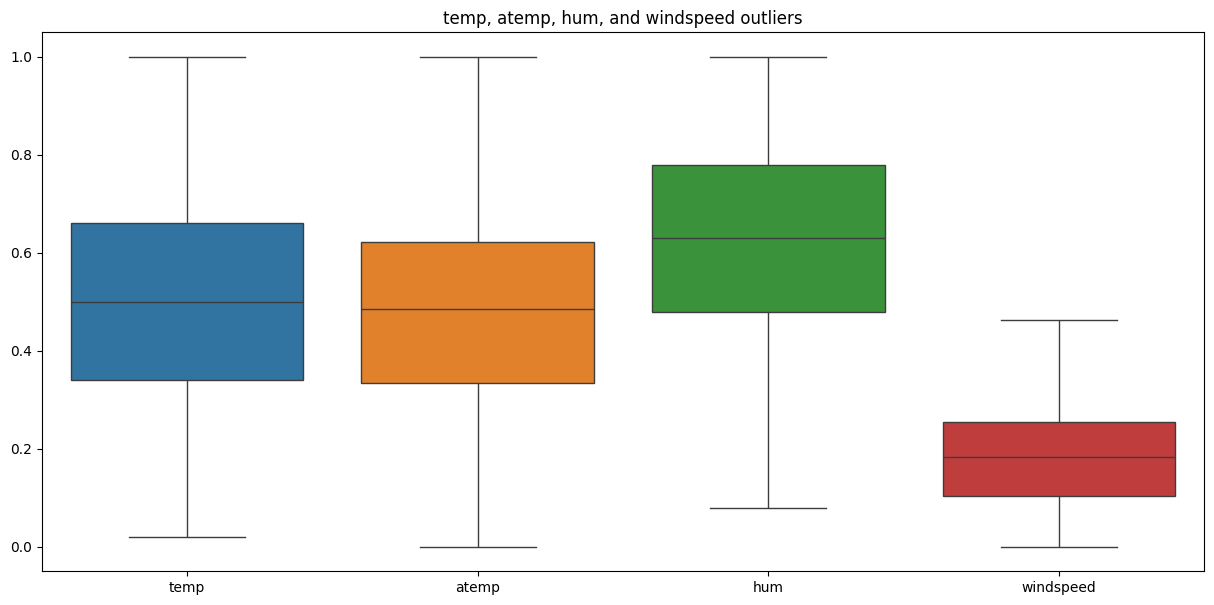

In [16]:
fig,ax=plt.subplots(figsize=(15,7))
sns.boxplot(data=hour_df[['temp','atemp','hum','windspeed']])
ax.set_title('temp, atemp, hum, and windspeed outliers')
plt.show()

**Insight**

Sudah tidak terdapat data outlier pada tabel **hour.csv**

## Exploratory Data Analysis (EDA)

### Explore ...

In [17]:
hour_df.describe()

,dteday,temp,atemp,hum,windspeed,casual,registered,total_count
count,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2012-01-02 04:08:34.552045568,0.496987,0.475775,0.628024,0.182893,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,0.500000,0.484800,0.630000,0.182893,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,1.000000,1.000000,1.000000,0.462700,367.000000,886.000000,977.000000
std,NaN,0.192556,0.171850,0.191633,0.110888,49.305030,151.357286,181.387599


**Insight:**
1. Banyaknya data pada tabel "hour" yaitu sebanyak 17379 data.
2. Dalam satu satuan jam, rata-rata banyaknya pengguna bike sharing adalah sebanyak 189.463088 = 189 orang.
3. Banyaknya pengguna bike sharing dalam satu satuan jam berkisar diantara 1 sampai 977 orang.
4. Dalam satu satuan jam, rata-rata banyaknya pengguna bike sharing yang berstatus casual adalah sebanyak 35.676218 = 35 orang.
5. Banyaknya pengguna bike sharing yang berstatus casual dalam satu satuan jam berkisar diantara 0 sampai 367 orang.
6. Dalam satu satuan jam, rata-rata banyaknya pengguna bike sharing yang berstatus registered adalah 153.786869 = 153 orang.
7. Banyaknya pengguna bike sharing yang berstatus registred dalam satu satuan jam berkisar diantara 0 sampai 886 orang.
8. Baik nilai maksimum maupun nilai minimum banyaknya pengguna bike sharing berstatus casual dan registered tidak terjadi pada jam yang sama.

In [18]:
hour_by_year_df = hour_df.groupby(by='yr').agg({
          'casual': ['sum'],
          'registered': ['sum'],
          'total_count': ['sum']
          })
hour_by_year_df

<ipython-input-18-54f0eaf3d54b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_by_year_df = hour_df.groupby(by='yr').agg({


,casual,registered,total_count
,sum,sum,sum
yr,,,
2011,247252,995851,1243103
2012,372765,1676811,2049576


**Insight**

Banyaknya pengguna *bike sharing* dari tahun 2011 ke tahun 2012 mengalami kenaikan baik secara keseluruhan maupun untuk kedua kategori status pengguna.

In [19]:
hour_by_year_df.diff()

,casual,registered,total_count
,sum,sum,sum
yr,,,
2011,NaN,NaN,NaN
2012,125513.0,680960.0,806473.0


**Insight**:

1. Banyaknya kenaikan pengguna *bike sharing* berstatus 'casual' adalah sebanyak 125513 orang.
2. Banyaknya kenaikan pengguna *bike sharing* berstatus 'registered' adalah sebanyak 680960 orang.
3. Banyaknya kenaikan pengguna *bike sharing* secara keseluruhan adalah sebanyak 125513 + 680960 = 806473 orang.

In [20]:
hour_by_season_df = hour_df.groupby(by='season').agg({
          'casual': ['sum'],
          'registered': ['sum'],
          'total_count': ['sum']
          })
hour_by_season_df

<ipython-input-20-122f6ade6264>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_by_season_df = hour_df.groupby(by='season').agg({


,casual,registered,total_count
,sum,sum,sum
season,,,
Spring,60622,410726,471348
Summer,203522,715067,918589
Fall,226091,835038,1061129
Winter,129782,711831,841613


**Insight**

1. Banyaknya pengguna *bike sharing* mengalami kenaikan pada musim spring -> summer dan summer -> fall. Namun banyaknya pengguna *bike sharing* mengalami penurunan pada musim fall -> winter
2. Angka pengguna *bike sharing* terbanyak berada di musim Fall sebanyak 1061129 orang, sedangkan angka pengguna *bike sharing* paling sedikit berada di musim Spring sebanyak 471348 orang.

In [21]:
hour_by_hr_df = hour_df.groupby(by='hr').agg({
          'casual': ['sum'],
          'registered': ['sum'],
          'total_count': ['sum']
          })
hour_by_hr_df

<ipython-input-21-6b836a1119b5>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_by_hr_df = hour_df.groupby(by='hr').agg({


,casual,registered,total_count
,sum,sum,sum
hr,,,
0,7375,31755,39130
1,4709,19455,24164
2,3412,12940,16352
3,1893,6281,8174
4,874,3554,4428
5,1012,13249,14261
6,3017,52115,55132
7,8037,146134,154171


**Insight**

1. Angka pengguna *bike sharing* secara keseluruhan terbanyak berada di jam ke-17 sebanyak 336860 orang, sedangkan angka pengguna *bike sharing* secara keseluruhan paling sedikit berada di jam ke-4 sebanyak 4428 orang.
2. Angka pengguna *bike sharing* berstatus 'casual' terbanyak berada di jam ke-14 sebanyak 55089 orang, sedangkan angka pengguna *bike sharing* berstatus 'casual' paling sedikit berada di jam ke-4 sebanyak 874 orang.
3. Angka pengguna *bike sharing* berstatus 'registered' terbanyak berada di jam ke-17 sebanyak 282640 orang, sedangkan angka pengguna *bike sharing* berstatus 'registered' paling sedikit berada di jam ke-4 sebanyak 3554 orang.

In [22]:
hour_df[['temp', 'hum', 'windspeed']].corrwith(hour_df['total_count'])

,0
temp,0.404772
hum,-0.328782
windspeed,0.106874


**Insight**

1. Nilai korelasi antara "temp" dengan "total_count" adalah 0.404772. Atau dengan kata lain variabel "temp" dan "total_count" berkorelasi **sedang** dengan **kenaikan** nilai "temp" menyebabkan nilai "total_count" ikut **naik**.
2. Nilai korelasi antara "hum" dengan "total_count" adalah -0.328782. Atau dengan kata lain variabel "hum" dan "total_count" berkorelasi **sedang** dengan **kenaikan** nilai "hum" menyebabkan nilai "total_count" **turun**.
3. Nilai korelasi antara "windspeed" dengan "total_count" adalah 0.106874. Atau dengan kata lain variabel "windspeed" dan "total_count" berkorelasi **lemah** dengan **kenaikan** nilai "windspeed" menyebabkan nilai "total_count" ikut **naik**.

In [23]:
hour_df['holiday_in_workingday'] = hour_df['holiday'] & ~hour_df['day_name'].isin(['Sat', 'Sun'])
hour_df['weekend'] = hour_df['day_name'].isin(['Sat', 'Sun'])

hour_df.head()

,dteday,season,yr,mnth,hr,holiday,day_name,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_count,holiday_in_workingday,weekend
0,2011-01-01,Spring,2011,Jan,0,False,Sat,False,1,0.24,0.2879,0.81,0.0,3,13,16,False,True
1,2011-01-01,Spring,2011,Jan,1,False,Sat,False,1,0.22,0.2727,0.80,0.0,8,32,40,False,True
2,2011-01-01,Spring,2011,Jan,2,False,Sat,False,1,0.22,0.2727,0.80,0.0,5,27,32,False,True
3,2011-01-01,Spring,2011,Jan,3,False,Sat,False,1,0.24,0.2879,0.75,0.0,3,10,13,False,True
4,2011-01-01,Spring,2011,Jan,4,False,Sat,False,1,0.24,0.2879,0.75,0.0,0,1,1,False,True


Membuat kolom baru "holiday_in_workingday" dengan syarat value "holiday" sama dengan True dan value "day_name" tidak sama dengan 'Sat' atau 'Sun'

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah terjadi kenaikan pengguna bike sharing berdasarkan tahun, musim, ataupun jam?

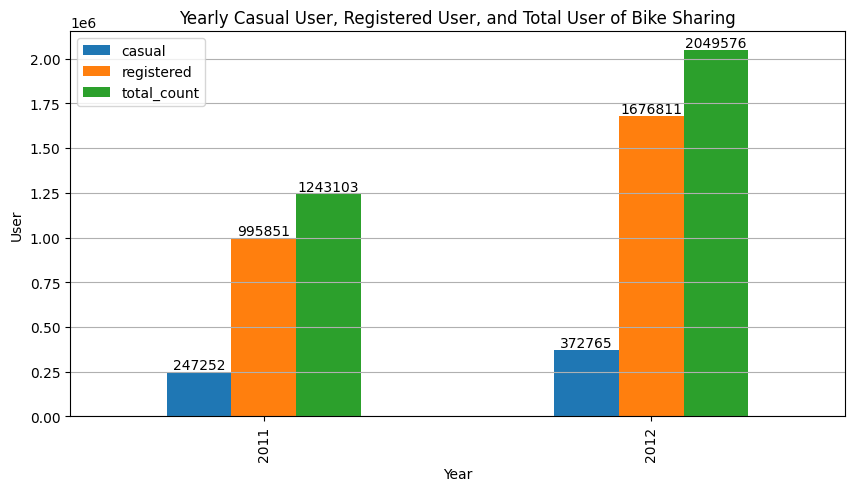

In [24]:
hour_by_year_df.columns = ['casual', 'registered', 'total_count']
ax = hour_by_year_df.plot(kind='bar', figsize=(10,5))

plt.title('Yearly Casual User, Registered User, and Total User of Bike Sharing')
plt.xlabel('Year')
plt.ylabel('User')

for bars in ax.containers:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, int(height),
                ha='center', va='bottom')

plt.grid(axis='y')
plt.show()

**Insight**

- Banyaknya total pengguna *bike sharing* mengalami kenaikan dari Tahun 2011 ke Tahun 2012, yaitu dari 1243103 pengguna menjadi 2049576 pengguna.
- Banyaknya pengguna berstatus 'casual' dan 'registered' juga mengalami kenaikan dari Tahun 2011 ke Tahun 2012.
- Banyaknya pengguna yang berstatus 'registered' pada Tahun 2012 melebihi total pengguna pada Tahun 2011.

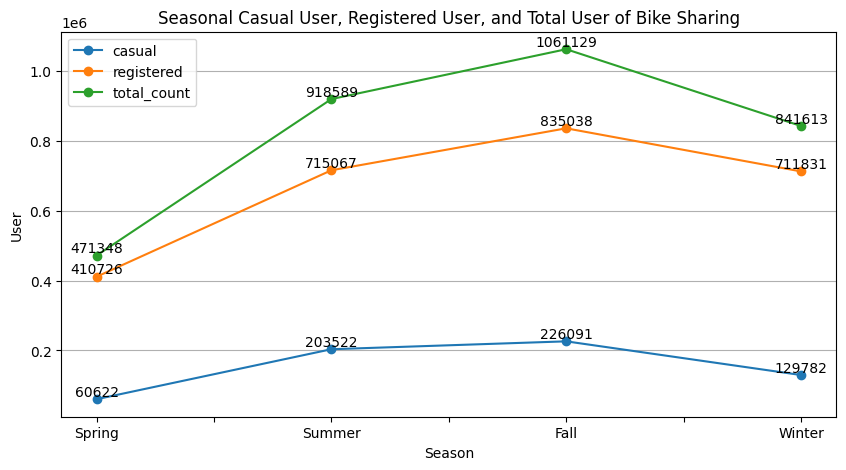

In [25]:
hour_by_season_df.columns = ['casual', 'registered', 'total_count']
ax=hour_by_season_df.plot(kind='line', marker='o', figsize=(10,5))

plt.title('Seasonal Casual User, Registered User, and Total User of Bike Sharing')
plt.xlabel('Season')
plt.ylabel('User')

for line in ax.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        ax.text(x, y, int(y), ha='center', va='bottom')

plt.grid(axis='y')
plt.show()

**Insight**

- Banyaknya total pengguna *bike sharing* mengalami kenaikan pada Musim Spring -> Summer dan Summer -> Fall. Namun, total pengguna mengalami penurunan pada musim Fall -> Winter
- Hal yang sama terjadi baik bagi pengguna yang berstatus 'casual' maupun  'registered'.
- Banyaknya jumlah pengguna terbanyak terjadi di Musim Fall.
- Banyaknya jumlah pengguna tersedikit terjadi di Musim Spring.

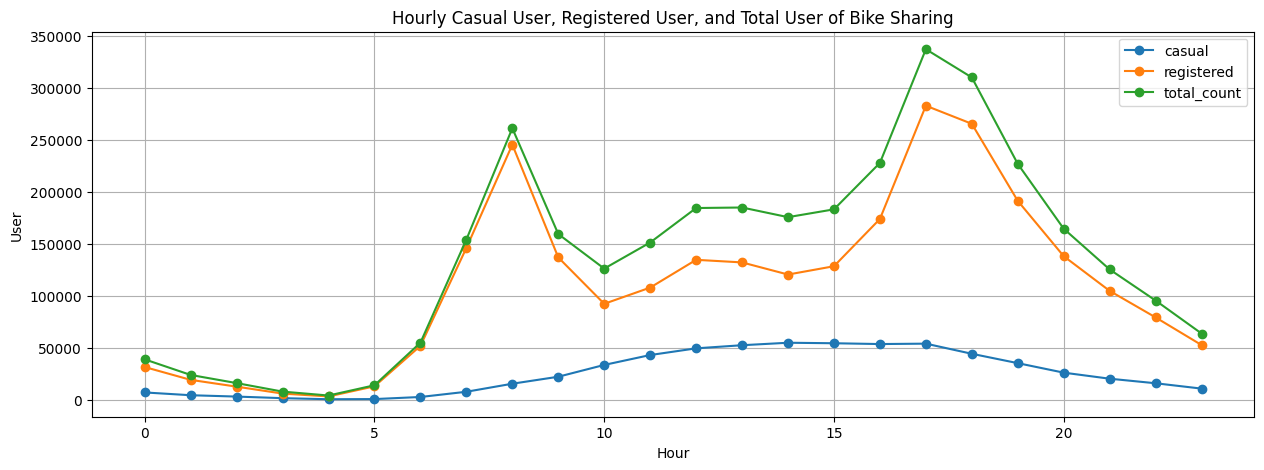

In [26]:
hour_by_hr_df.columns = ['casual', 'registered', 'total_count']
ax=hour_by_hr_df.plot(kind='line', marker='o', figsize=(15,5))

plt.title('Hourly Casual User, Registered User, and Total User of Bike Sharing')
plt.xlabel('Hour')
plt.ylabel('User')

plt.grid(True)
plt.show()

**Insight**

- Untuk total pengguna *bike user* diperoleh insight:
  
  - Terjadi penurunan jumlah pengguna dari jam ke-0 hingga jam ke-4.
  - Setelahnya, terjadi kenaikan jumlah pengguna hingga jam ke-8.
  - Setelahnya, terjadi penurunan jumlah pengguna hingga jam ke-10.
  - Setelahnya, terjadi kenaikan jumlah pengguna hingga jam ke-12.
  - Setelahnya, terjadi penurunan jumlah pengguna hingga jam ke-14.
  - Setelahnya, terjadi kenaikan jumlah pengguna hingga jam ke-17.
  - Terakhir, terjadi penurunan jumlah pengguna hingga jam ke-23.
  - Jumlah pengguna terbanyak terjadi pada jam ke-17.
  - Jumlah pengguna tersedikit terjadi pada jam ke-4.
- Hal yang sama terjadi bagi pengguna yang berstatus 'registered'.
- Untuk pengguna yang berstatus 'casual' diperoleh insight:
  - Terjadi penurunan jumlah pengguna dari jam ke-0 hingga jam ke-4.
  - Setelahnya, terjadi kenaikan jumlah pengguna hingga jam ke-14.
  - Setelahnya, terjadi penurunan jumlah pengguna hingga jam ke-16.
  - Setelahnya, terjadi kenaikan jumlah pengguna hingga jam ke-17.
  - Terakhir, terjadi penurunan jumlah pengguna hingga jam ke-23.
  - Jumlah pengguna terbanyak terjadi pada jam ke-14
  - Jumlah pengguna tersedikit terjadi pada jam ke-4.


### Pertanyaan 2: Apakah terdapat korelasi antara nilai temp, hum, dan windspeed dengan banyaknya pengguna bike sharing?

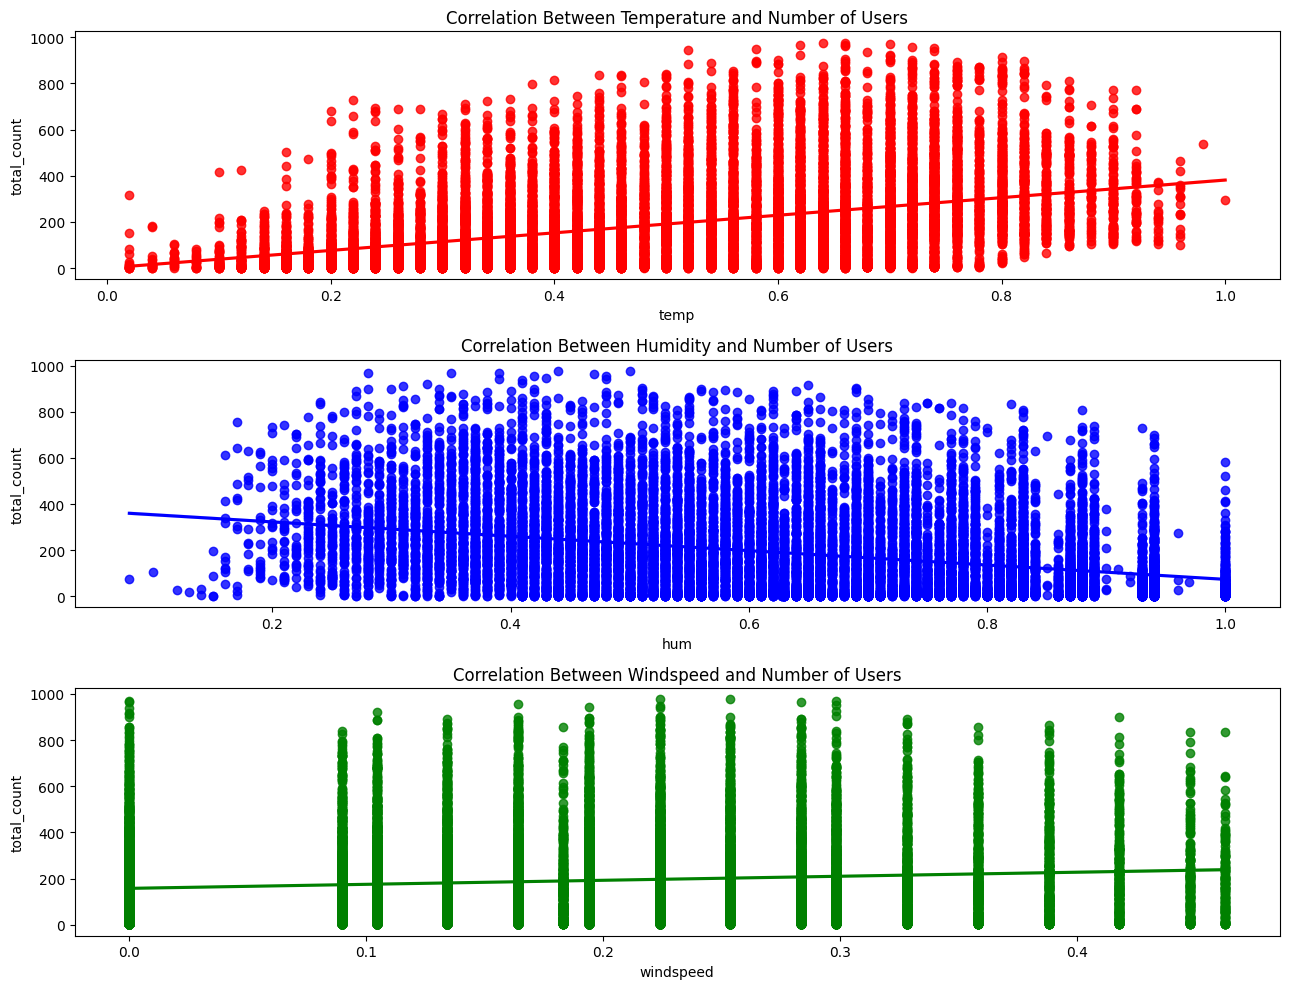

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(13, 10))

sns.regplot(x=hour_df['temp'], y=hour_df['total_count'], ax=ax1, color='red')
ax1.set(title="Correlation Between Temperature and Number of Users")

sns.regplot(x=hour_df['hum'], y=hour_df['total_count'], ax=ax2, color='blue')
ax2.set(title="Correlation Between Humidity and Number of Users")

sns.regplot(x=hour_df['windspeed'], y=hour_df['total_count'], ax=ax3, color='green')
ax3.set(title="Correlation Between Windspeed and Number of Users")

plt.tight_layout()

plt.show()

**Insight:**
- Terdapat korelasi yang bersifat **sedang** antara temp dengan banyaknya pengguna *bike sharing* yang bernilai positif, artinya **bertambahnya** nilai temp menyebabkan banyaknya pengguna ikut **bertambah**.
- Terdapat korelasi yang bersifat **sedang** antara hum dengan banyaknya pengguna *bike sharing* yang bernilai negatif, artinya **bertambahnya** nilai hum menyebabkan banyaknya pengguna menjadi **berkurang**.
-Terdapat korelasi yang bersifat **lemah** antara windspeed dengan banyaknya pengguna *bike sharing* yang bernilai positif, yaitu **bertambahnya** nilai windspeed menyebabkan banyaknya pengguna ikut **bertambah**.

## Analisis Lanjutan (Opsional)

### Pertanyaan 3: Bagaimana perbandingan total dan rata-rata banyaknya pengguna *bike sharing* pada *workingday*, *weekend*, dan *holiday* yang terjadi di *workingday*?

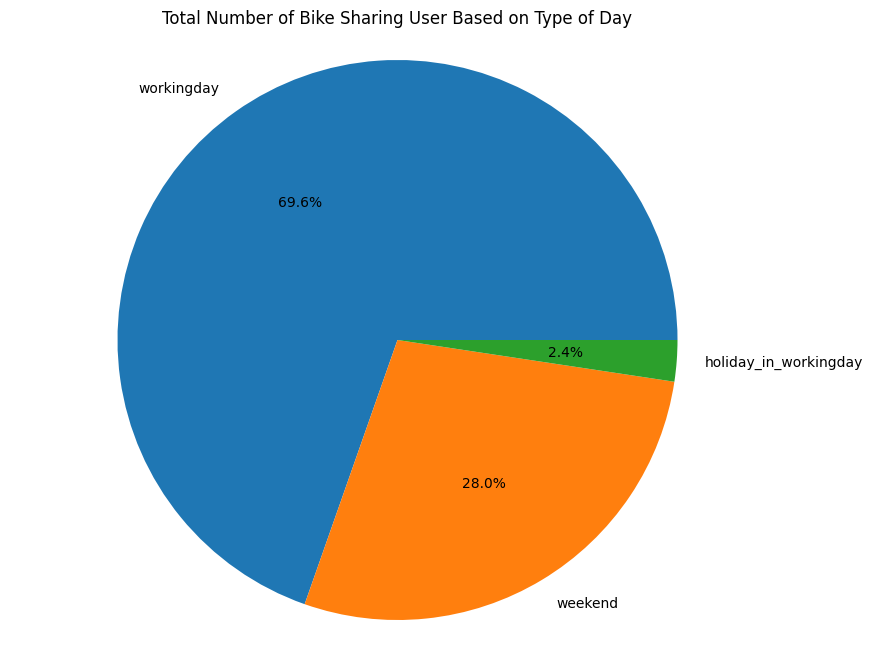

In [28]:
values = {
    'workingday': hour_df[hour_df['workingday']]['total_count'].sum(),
    'weekend': hour_df[hour_df['weekend']]['total_count'].sum(),
    'holiday_in_workingday': hour_df[hour_df['holiday_in_workingday']]['total_count'].sum()
}

values_df = pd.DataFrame(list(values.items()), columns=['Category', 'Value'])

plt.figure(figsize=(10, 8))
plt.pie(values_df['Value'], labels=values_df['Category'], autopct='%1.1f%%')

plt.axis('equal')

plt.title('Total Number of Bike Sharing User Based on Type of Day')
plt.show()


**Insight:**
- Persentase jumlah pengguna *bike sharing* terbanyak berada di *workingday*, yaitu sebesar 69.6%.
- Persentase jumlah pengguna *bike sharing* tersedikit berada di *holiday* yang terjadi di *workingday* yaitu sebesar 2.4%.

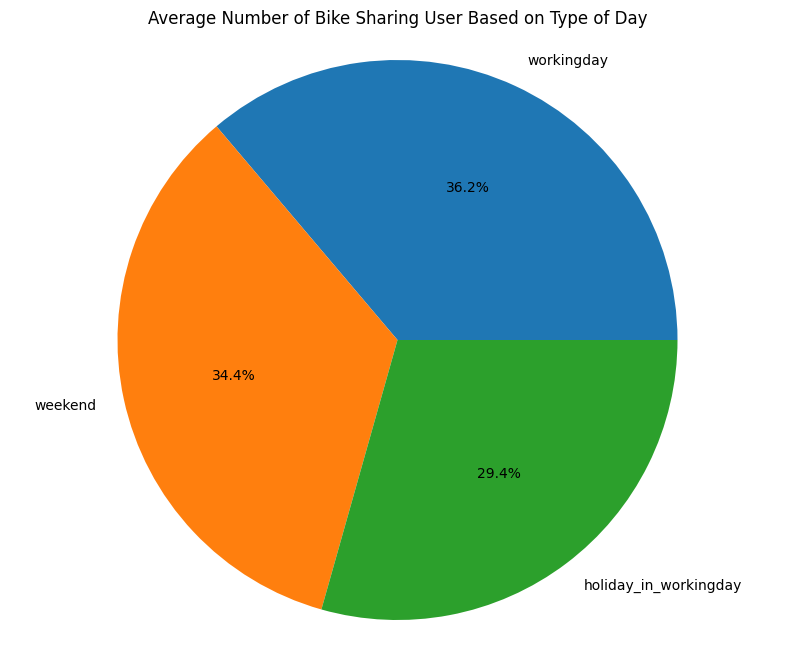

In [29]:
values = {
    'workingday': hour_df[hour_df['workingday']]['total_count'].mean(),
    'weekend': hour_df[hour_df['weekend']]['total_count'].mean(),
    'holiday_in_workingday': hour_df[hour_df['holiday_in_workingday']]['total_count'].mean()
}

values_df = pd.DataFrame(list(values.items()), columns=['Category', 'Value'])

plt.figure(figsize=(10, 8))
plt.pie(values_df['Value'], labels=values_df['Category'], autopct='%1.1f%%')

plt.axis('equal')

plt.title('Average Number of Bike Sharing User Based on Type of Day')
plt.show()


**Insight:**
- Persentase rata-rata pengguna *bike sharing* terbanyak berada di *workingday*, yaitu sebesar 36.2%.
- Persentase rata-rata pengguna *bike sharing* tersedikit berada di *holiday* yang terjadi di *workingday* yaitu sebesar 29.4%.

## Conclusion

- Conclution pertanyaan 1:
  - Terjadi kenaikan jumlah pengguna *bike sharing* dari Tahun 2011 ke Tahun 2012
  - Terjadi kenaikan dan penurunan jumlah pengguna *bike sharing* berdasarkan musim dengan jumlah pengguna terbanyak terjadi di Musim Fall dan jumlah pengguna tersedikit terjadi di Musim Spring.
  - Terjadi kenaikan dan penurunan jumlah pengguna *bike sharing* berdasarkan jam dengan jumlah pengguna terbanyak terjadi pada jam ke-17 dan jumlah pengguna tersedikit terjadi pada jam ke-4.
- Conclution pertanyaan 2:
  - Baik temp maupun windpseed memiliki korelasi bernilai **positif** dengan banyaknya pengguna *bike sharing*. Sedangkan, hum memiliki korelasi yang bernilai **negatif** dengan banyaknya pengguna *bike sharing*.
  - Korelasi yang dimiliki temp maupun hum dengan banyaknya pengguna *bike sharing* bersifat **sedang**. Sedangkan, korelasi yang dimiliki windspeed dengan banyaknya pengguna *bike sharing* bersifat **lemah**.
- Conclution pertanyaan 3:
  - Persentase total pengguna *bike sharing* terbanyak berada di *workingday*, yaitu sebesar 69.6%, sedangkan persentase jumlah pengguna tersedikit berada di *holiday* yang terjadi di *workingday* yaitu sebesar 2.4%.
  - Persentase rata-rata pengguna *bike sharing* terbanyak berada di *workingday*, yaitu sebesar 36.2%, sedangkan persentase jumlah pengguna tersedikit berada di *holiday* yang terjadi di *workingday* yaitu sebesar 29.4%.
